# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Time series analysis: decomposition
#### 3. Testing for stationarity

## 1. Importing your libraries and data

In [47]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [53]:
# Importing data

df = pd.read_csv(r'C:\Users\kasia\Desktop\Career Foundry\Achievement 6\World Universities Ranking\02 Data\Prepared Data\cleaned_data.csv', index_col = False)

In [55]:
df.head(10)

,Unnamed: 0,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,0,1,Harvard University,USA,1,7,9,1,1,1,1,496.6995,5,100.00,2012
1,1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496.6995,1,91.67,2012
2,2,3,Stanford University,USA,3,17,11,5,4,2,2,496.6995,15,89.50,2012
3,3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496.6995,50,86.17,2012
4,4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496.6995,18,85.21,2012
5,5,6,Princeton University,USA,5,8,14,2,53,33,26,496.6995,101,82.50,2012
6,6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,496.6995,26,82.34,2012
7,7,8,Yale University,USA,6,14,31,12,14,6,15,496.6995,66,79.14,2012
8,8,9,Columbia University,USA,7,23,21,10,13,12,14,496.6995,5,78.86,2012
9,9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,496.6995,16,78.55,2012


In [57]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [59]:
df.shape

(2200, 15)

In [61]:
df.columns

Index(['Unnamed: 0', 'world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [63]:
# Set the 'date' column as the index
df.set_index('year', inplace=True)

In [65]:
# Resample the data to monthly frequency, summing the number of quality_of_education
df2 = df['quality_of_education'].resample('M').sum()

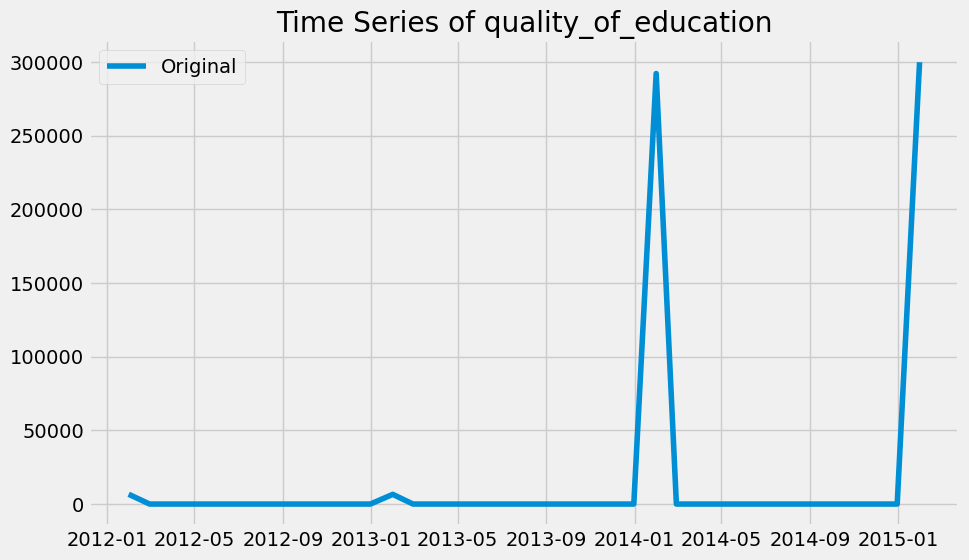

In [67]:
# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(df2, label='Original')
plt.title('Time Series of quality_of_education')
plt.legend()
plt.show()

## 2. Time-series analysis: decomposition

In [70]:
# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(df2, model='additive', period=3)

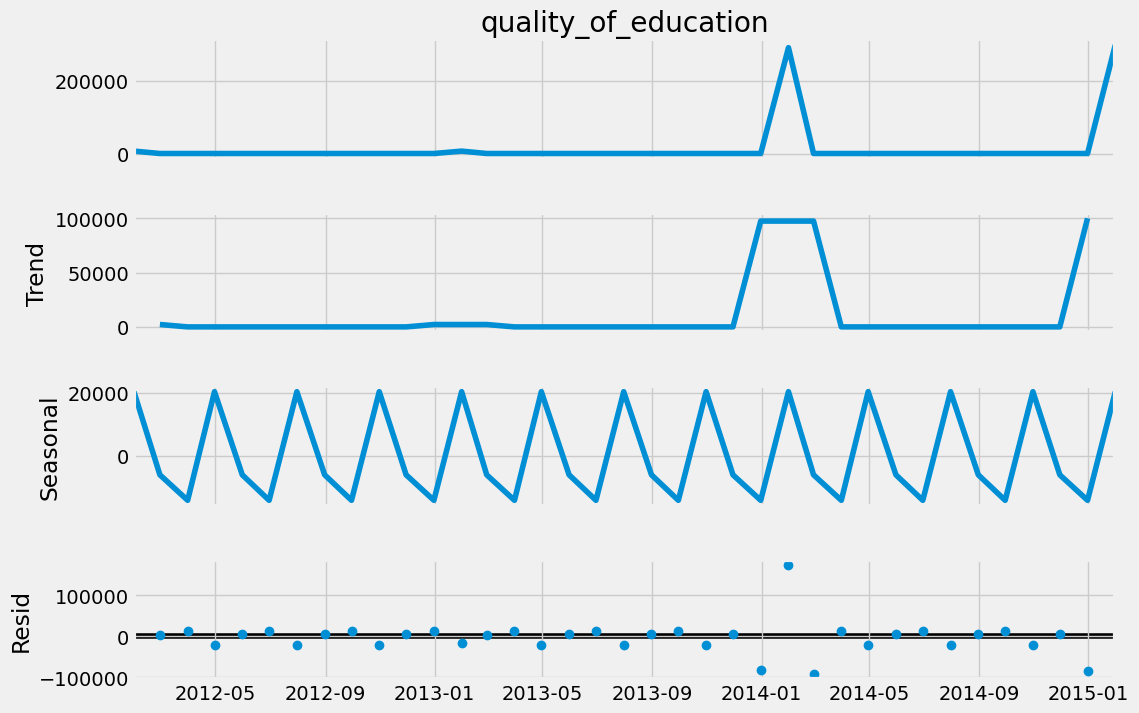

In [72]:
# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

#### The plot depicts a time series decomposition of the quality of education, breaking it into its trend, seasonal, and residual components. The original data shows notable peaks around early 2014 and early 2015. The trend component indicates a generally stable long-term progression with sharp increases during these peaks. The seasonal component reveals a consistent pattern, suggesting regular cyclical effects likely tied to academic cycles or recurring events. The residuals fluctuate around zero with some outliers, particularly during the peak periods, pointing to random fluctuations or unusual events impacting the quality of education. Overall, the decomposition highlights stable trends, strong seasonality, and occasional significant deviations in the data.

## 3. Testing for stationarity

In [75]:
# Function to perform and display the Dickey-Fuller test results
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

# Apply the test using the function on the time series
dickey_fuller(df2)


Dickey-Fuller Stationarity test:
Test Statistic                 -4.384661
p-value                         0.000316
Number of Lags Used             0.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


p-value = 0.0003 < 0.05
and Test Statistic < critical values
=> data is stationary!

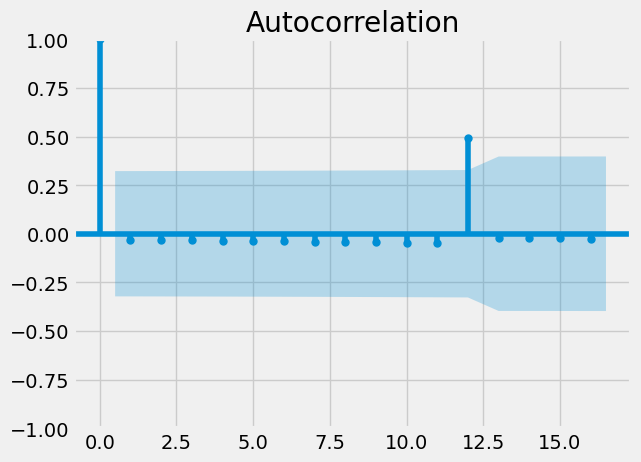

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df2)
plt.show()